<a href="https://colab.research.google.com/github/eaguilar98/eaguilar98/blob/main/eMManuel_Challenge_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personas desaparecidas en México en 2010-15 ⛔

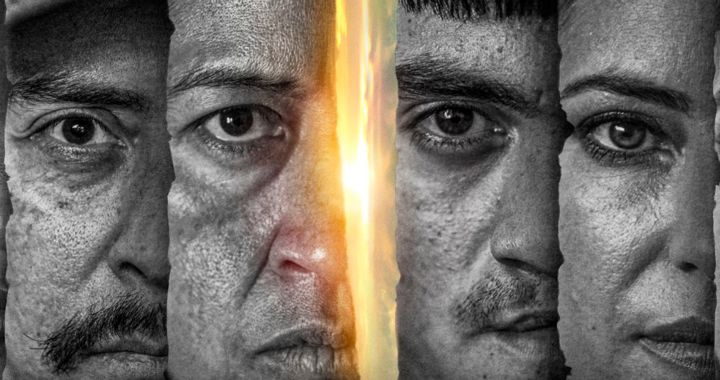

EL siguiente dataset es un conjunto de datos acerca de personas desaperecidas en la república mexicana, del año 2010 al 2015.

### Diccionario de datos:

- inegi: Clave dada por el INEGI a cada municipio. Primeros dos dígitos 
- corresponden al estado, los siguientes tres al municipio
- ent: Parte de la clave de INEGI que corresponde a la entidad federativa.
- nom_ent: Nombre oficial de la entidad federativa.
- year: Año en el que se denunciaron las despariciones
- sexo: Sexo de las personas desaparecidas
- rango_edad: Rango de edades de las personas en el grupo en cuestión.
- pob: Población total del municipio en ese año para ese grupo.
- total: Total de personas deparecidas de ese grupo en ese año.
- tdes: Tasa de desaparecidos en ese municipio en ese grupo



In [ ]:
archivo="/content/rnped_limpia.csv" 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline #Se utilizar para mostrar la gráfica inmediatamente después del código 
import seaborn as sns

In [ ]:
df = pd.read_csv(archivo)
df.head(4)

,inegi,ent,nom_ent,mun,nom_mun,year,sexo,rango_edad,pob,total,tdes
0,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,0 a 11 años,95973,1,1.04
1,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,12 a 17 años,45451,0,0.00
2,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,18 a 25 años,56448,1,1.77
3,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,26 a 40 años,86660,0,0.00


## Hay 3 preguntas clave que podemos responder con estos datos.

1. ¿Cuántos desaparecidos hubo por municipio en...2011 (año más violento)?
2. ¿Cuál es el porcentaje de desaparecidos por entidad en el año 2011?
3. ¿Cuál es la tendencia de la tasa de desaparecidos en los años del 2010 al 2015 tomando en cuenta una línea por cada género?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176844 entries, 0 to 176843
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   inegi       176844 non-null  int64  
 1   ent         176844 non-null  int64  
 2   nom_ent     176844 non-null  object 
 3   mun         176844 non-null  int64  
 4   nom_mun     176844 non-null  object 
 5   year        176844 non-null  int64  
 6   sexo        176844 non-null  object 
 7   rango_edad  176844 non-null  object 
 8   pob         176844 non-null  int64  
 9   total       176844 non-null  int64  
 10  tdes        176844 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 14.8+ MB


1. ¿Cuántos desaparecidos hubo por municipio en...2011 (año más violento)?

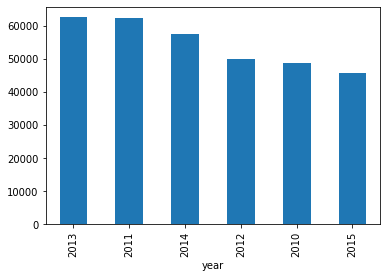

In [ ]:
df.groupby("year")["tdes"].sum().sort_values(ascending=False).plot(kind="bar")

2013 y 2011 con una cantidad muy similar de desaparecidos ☹

In [ ]:
#Filtramos el año 2011 y lo agrupamos por municio y año, sumando los numero de desaparecidos
df_2011=df[df["year"]==2011].groupby(["nom_mun","year"])["tdes"].sum()
#Convertimos el resultado en un data frame
df_2011 = pd.DataFrame(df_2011, index=None)
df_2011.reset_index(inplace=True)

In [ ]:
df_2011.head(5)

,nom_mun,year,tdes
0,Abalá,2011,0.00
1,Abasolo,2011,73.21
2,Abejones,2011,0.00
3,Acacoyagua,2011,0.00
4,Acajete,2011,0.00


In [ ]:
#Sacamos los top 15 municipios con mas violencia para poderlos pintar en el eje y de la grafica
df_2011_top20=df_2011.sort_values("tdes", ascending=False).head(15)

In [ ]:
# Insepección visual rapida
df_2011_top20.head(5)

,nom_mun,year,tdes
935,Mier,2011,5139.32
602,Guerrero,2011,4672.73
462,Cucurpe,2011,3740.38
277,Cerralvo,2011,1711.37
2126,Tuxcacuesco,2011,1350.77


### Los municipios de México con ma personas desaparecidas en 2011 ⚫


1.   Mier con 51 Mil
2.   Guerrero 46 Mil
3.   Cucurpe 37 Mil






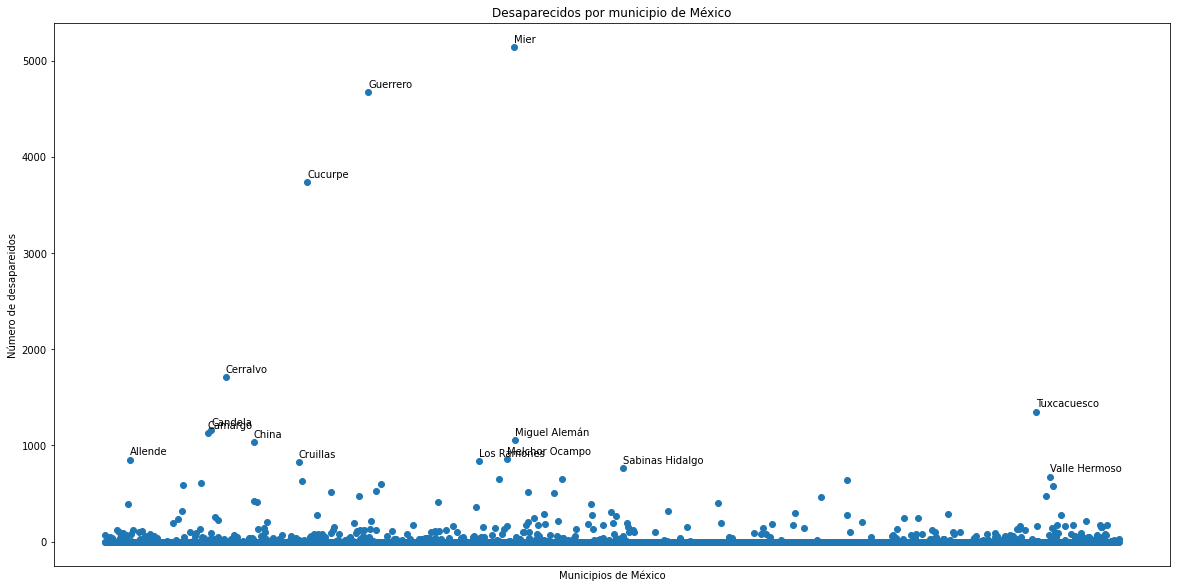

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=df_2011["nom_mun"],y=df_2011["tdes"])
plt.fit_reg=False

plt.title("Desaparecidos por municipio de México")
plt.xlabel("Municipios de México")
plt.ylabel("Número de desapareidos")

#que no pinte los municipios, son muchos y se sobre-escriben
plt.xticks([])

#colocamos un texto en cordenadas x,y de los municipios mas violentos
# X = valor del indice, establece la posicion del texto en eje x
# Y = numero de desaparecidos,establece la posición del texto en eje y
# nom_mun Nombre del municipio, establece el texto

for ind in df_2011_top20.index:
    plt.text(ind, int(df_2011_top20["tdes"][ind])+50, df_2011_top20["nom_mun"][ind],fontsize=10)

plt.show()

## Pregunta 2: ¿Cuál es la tendencia de la tasa de desaparecidos en los años del 2010 al 2015 tomando en cuenta una línea por cada género?


In [ ]:
#Agregamos la columna fecha de tipo datetime formato de año
df["fecha"]=pd.to_datetime(df["year"], format="%Y"  )

In [ ]:
df.head(4)

,inegi,ent,nom_ent,mun,nom_mun,year,sexo,rango_edad,pob,total,tdes,fecha
0,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,0 a 11 años,95973,1,1.04,2010-01-01
1,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,12 a 17 años,45451,0,0.00,2010-01-01
2,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,18 a 25 años,56448,1,1.77,2010-01-01
3,1001,1,Aguascalientes,1,Aguascalientes,2010,Hombre,26 a 40 años,86660,0,0.00,2010-01-01


In [ ]:
# que valores unicos tiene, uno nunca sabe 
df["sexo"].unique()

array(['Hombre', 'Mujer'], dtype=object)

In [ ]:
# Funcion para regresar agrupado el total de desaparecidos por año y genero
def df_tdes_year(df,genero):
    df = df[df["sexo"]==genero].groupby(["year"])[["pob","tdes"]].sum()
    df=pd.DataFrame(df, index=None)
    df.reset_index(inplace=True)
    df["tasa_des"]=(df["tdes"]/df["pob"])*100

    return df

In [ ]:
# Informacion para Hombres
df_year_hombre=df_tdes_year(df,"Hombre")

#Información para mujeres
df_year_mujer=df_tdes_year(df,"Mujer")

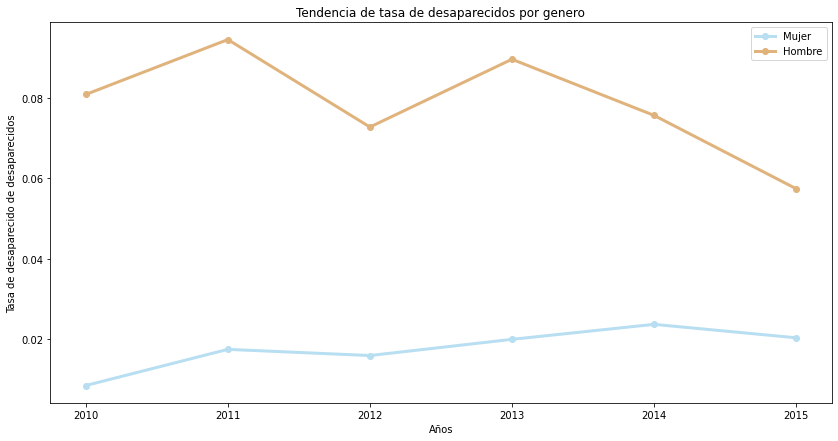

In [ ]:
plt.figure(figsize=(14,7))

#linea de mujeres
plt.plot(
    df_year_mujer["year"],
    df_year_mujer["tasa_des"],
    marker='o',
    linewidth = '3', 
    color="#b8def2"
)

#linea de Hombres
plt.plot(
    df_year_hombre["year"],
    df_year_hombre["tasa_des"],
    marker='o',
    linewidth = '3', 
    color="#e0b37d"
)

plt.legend(["Mujer","Hombre"])
plt.title('Tendencia de tasa de desaparecidos por genero')
plt.xlabel('Años')
plt.ylabel('Tasa de desaparecido de desaparecidos')
#plt.grid(True)

plt.show()

## Pregunta 3: ¿Cuál es la tasa de desaparecidos por género y rango de edad?


In [ ]:
#agrupamos la información por genero y rango de edad
df_rango=df.groupby(["sexo","rango_edad"])[["pob","tdes"]].sum()

#calculamos la tasa de desaparecidos 
df_rango["tasa"]=df_rango["tdes"]/df_rango["pob"]*100

#reinicamos el indice
df_rango.reset_index(inplace=True)

In [ ]:
# Vemos como quedo agrupada la info
df_rango[["sexo","rango_edad","tasa"]]

,sexo,rango_edad,tasa
0,Hombre,0 a 11 años,0.001766
1,Hombre,12 a 17 años,0.055031
2,Hombre,18 a 25 años,0.158236
3,Hombre,26 a 40 años,0.120161
4,Hombre,41 a 64 años,0.074150
5,Hombre,65 o más años,0.093521
6,Mujer,0 a 11 años,0.002309
7,Mujer,12 a 17 años,0.061092
8,Mujer,18 a 25 años,0.035840
9,Mujer,26 a 40 años,0.012578


In [ ]:
# Acomodamos la info para el mapa de calor
df_rango_v2=df_rango.pivot("rango_edad","sexo","tasa")
df_rango_v2

sexo,Hombre,Mujer
rango_edad,,
0 a 11 años,0.001766,0.002309
12 a 17 años,0.055031,0.061092
18 a 25 años,0.158236,0.035840
26 a 40 años,0.120161,0.012578
41 a 64 años,0.074150,0.008349
65 o más años,0.093521,0.006907


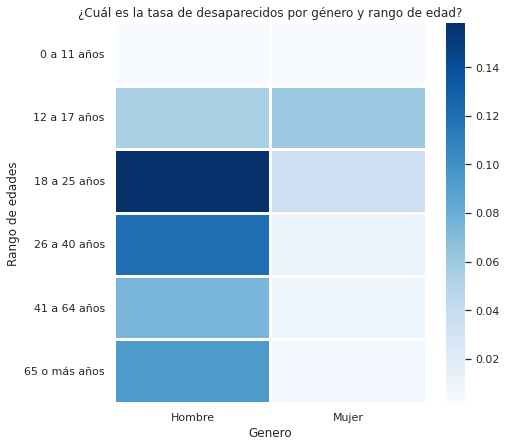

In [ ]:
#@title
plt.figure(figsize=(7,7))
sns.set()
ax = sns.heatmap(df_rango_v2, cmap='Blues',linewidths=2)
plt.title("¿Cuál es la tasa de desaparecidos por género y rango de edad?")
plt.xlabel("Genero")
plt.ylabel("Rango de edades")
plt.show()

# La tasa desaparecidos por genero y rango de edad


1.   Mujeres : La tasa mas alta de desaparecidos es entre los **12 a 17** años
2.   Hombres : La tama mas alta es entre **18 a 25** y **26 a 40**

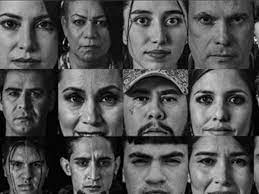


